In [5]:
import pandas as pd
from tqdm import tqdm
from IPython import display
import os
from PIL import Image
from PIL import ImageDraw

In [8]:
data_to_check_path = "../data/interim/data_to_label.csv"
path_images= "/mnt/win_share/doc_sec_output/OFA_run_110123"

In [10]:
if os.path.exists(data_to_check_path):
    df = pd.read_csv(data_to_check_path)
else:
    print(f"incorrect path: {data_to_check_path}")

if "labeler" not in df.columns:
    df["labeler"] = ""
    df.to_csv(data_to_check_path, index=False)

# if "manual_check" not in df.columns:
#     df["manual_check"] = ""
#     df.to_csv(data_to_check_path, index=False)

incorrect path: ../data/interim/data_to_label.csv


NameError: name 'df' is not defined

In [ ]:

def get_image(path_image, index):
    file = df.iloc[index]["id"]
    image = Image.open(os.path.join(path_image, str(file)+".jpg"), mode="r")
    x1 = df.iloc[index]["x1"]
    y1 = df.iloc[index]["y1"]
    x2 = df.iloc[index]["x2"]
    y2 = df.iloc[index]["y2"]
    img = ImageDraw.Draw(image)
    img.rectangle([(x1,y1),(x2,y2)], outline ="green")
    return image

In [ ]:
def display_images_with_predictions(df, start_index=0, end_index=10):
    print("If you want to leave the tool, enter stop")
    labeler_name = input("what is your name?")
    print()
    counter_labeled = 0
    for i in tqdm(range(start_index, end_index)):
        display.clear_output(wait=True)
        id = df.iloc[i]["id"]
        lemma = df.iloc[i]["lemma"]
        print("Searching for the next Record-card: Hold on")
        if df.loc[i, "labeler"] != "":
            display.display(get_image(path_images, i))
            print(i, len(df))
            print("id: ", id)
            print("lemma: ", lemma)
            print("*"*100)
            correct_label= input("Is this record-card correct labeled?")
            print()

            df.to_csv(data_to_check_path, index=False)
            if "'" in correct_label:
                correct_label = correct_label.replace(("'",""))
            if correct_label == "stop":
                print("*"*100)
                print("Bravo! You reviewed", counter_labeled, "record-cards \n Thank you!")
                print("*"*100)
                return df, labeler_name
            else:
                df.loc[i, "manual_check"] = correct_label
                df.loc[i, "labeler"] = labeler_name
                df.to_csv(data_to_check_path, index=False)
                counter_labeled+=1

    return df, labeler_name


In [ ]:
si = 0
manual_check = df["manual_check"].tolist()
for i in range(len(df)):
    if type(manual_check[i]) != float:
        si = i
print("starting index is: ", si)

starting index is:  281


Searching for the next Record-card: Hold on


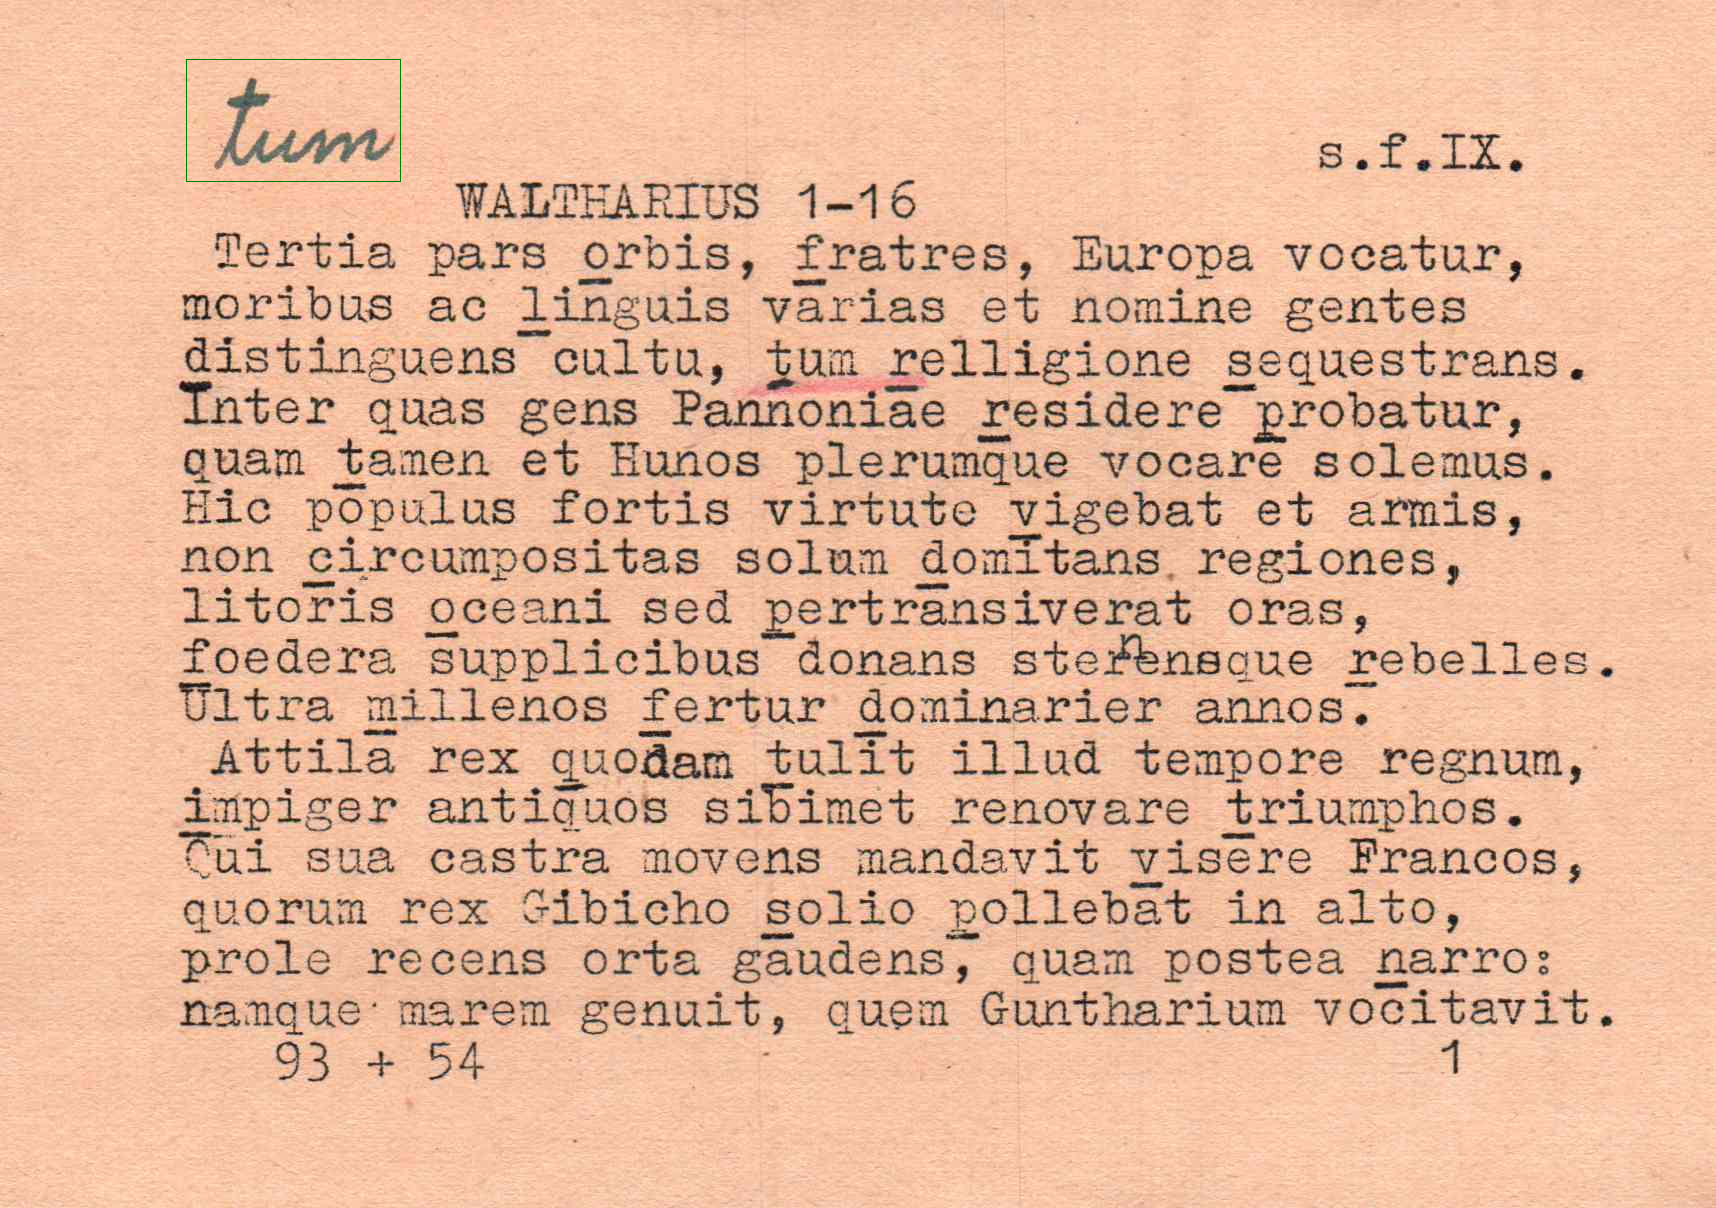

499 500
id:  220523
lemma:  tum
****************************************************************************************************
Is this record-card correct labeled?y


100%|████████████████████████████████████████████████████████████████████████████████| 219/219 [49:00<00:00, 13.42s/it]

In [ ]:
checked_data, labeler = display_images_with_predictions(pd.read_csv(data_to_check_path), start_index=si, end_index=len(df))
checked_data.to_csv(data_to_check_path, index=False)